## Inicio de exploração de dados
    

### Inicialização de libs e padrões de plotagem

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
from datetime import datetime

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Para gráficos ficarem maiores
plt.rcParams['figure.figsize'] = (12, 6)

print("Bibliotecas carregadas com sucesso!")

✓ Bibliotecas carregadas com sucesso!


### Conexão ao banco com fallback para csv caso dê um erro

In [7]:
# Conectar ao banco de dados PostgreSQL

def load_data_from_postgres():
    try:
        # Estabelecer conexão
        conn = psycopg2.connect(
            host='localhost',
            port=5432,
            database='weather_data',
            user='pipeline_user',
            password='pipeline_pass'
        )
        print("Conexão ao banco de dados estabelecida com sucesso!")

        # Carregar dados em um DataFrame do Pandas
        query = f"SELECT * FROM weather_data ORDER BY time;"
        df = pd.read_sql_query(query, conn)
        print(f"Dados carregados com sucesso da tabela weather_data!")

        return df

    except Exception as e:
        print(f"Erro ao conectar ou carregar dados: {e}")
        print("Tentando carregar dados de um arquivo CSV local...")
        
        # Tentar carregar dados de um arquivo CSV local como fallback
        try:
            df = pd.read_csv('../output/weather_data.csv')
            print("Dados carregados com sucesso do arquivo CSV local!")
            return df
        except Exception as csv_e:
            print(f"Erro ao carregar dados do arquivo CSV: {csv_e}")
            return None

    finally:
        if conn:
            conn.close()
            print("Conexão ao banco de dados fechada.")
            
            
df = load_data_from_postgres()

df.head(10)

Conexão ao banco de dados estabelecida com sucesso!
Dados carregados com sucesso da tabela weather_data!
Conexão ao banco de dados fechada.


C:\Users\Andre\AppData\Local\Temp\ipykernel_24924\3240290974.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,id,time,temp,humidity
0,1,2025-11-25 00:00:00,17.7,51
1,2,2025-11-25 01:00:00,17.1,53
2,3,2025-11-25 02:00:00,16.8,55
3,4,2025-11-25 03:00:00,16.6,56
4,5,2025-11-25 04:00:00,16.7,56
5,6,2025-11-25 05:00:00,18.0,53
6,7,2025-11-25 06:00:00,20.3,47
7,8,2025-11-25 07:00:00,22.5,42
8,9,2025-11-25 08:00:00,24.4,37
9,10,2025-11-25 09:00:00,25.7,33


### Informações basicas do dataframe

In [8]:
# Printando shape, linhas e colunas do df

print(f"Linhas do DataFrame: {df.shape[0]} e colunas: {df.shape[1]}")

# Verificando tipos de dados e valores nulos
df.info()

# Verificando tipos de dados
print(df.dtypes)

# verificando e contando nulos geral
nulos_geral = df.isnull().sum().sum()
print(f"Número total de valores nulos no DataFrame: {nulos_geral}")

# Printando período dos dados (primeira e última data)
print(f"Período dos dados: de {df['time'].min()} até {df['time'].max()}")

Linhas do DataFrame: 336 e colunas: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        336 non-null    int64         
 1   time      336 non-null    datetime64[ns]
 2   temp      336 non-null    float64       
 3   humidity  336 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 10.6 KB
id                   int64
time        datetime64[ns]
temp               float64
humidity             int64
dtype: object
Número total de valores nulos no DataFrame: 0
Período dos dados: de 2025-11-25 00:00:00 até 2026-01-02 23:00:00


### Estatísticas Descritivas

Estatísticas descritivas das colunas numéricas:

               id                           time        temp    humidity
count  336.000000                            336  336.000000  336.000000
mean   168.500000  2025-12-14 11:30:00.000000256   19.223512   39.904762
min      1.000000            2025-11-25 00:00:00   11.100000   16.000000
25%     84.750000            2025-11-28 11:45:00   16.275000   31.000000
50%    168.500000            2025-12-14 11:30:00   18.800000   40.000000
75%    252.250000            2025-12-30 11:15:00   22.400000   47.250000
max    336.000000            2026-01-02 23:00:00   27.100000   72.000000
std     97.139076                            NaN    3.858329   11.572091


Temperatura média: 19.22 °C
Temperatura máxima: 27.10 °C
Temperatura mínima: 11.10 °C


Humidade média: 39.90 %


Variação da temperatura: 16.00 °C




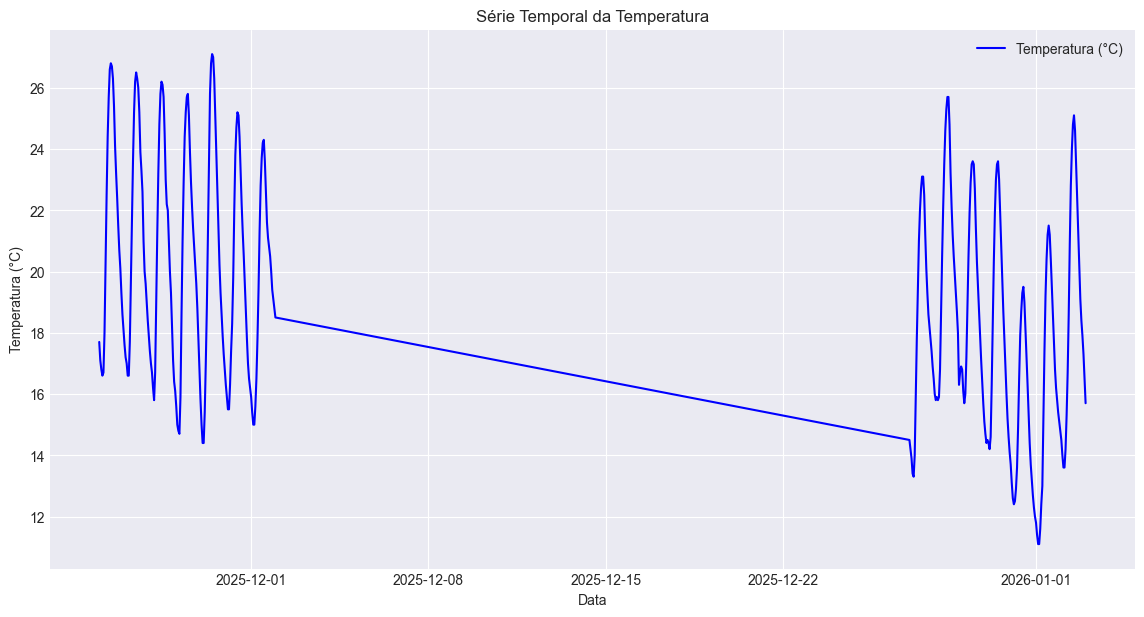

In [28]:
# Estatisticas descritivas básicas das colunas numéricas
print(f"Estatísticas descritivas das colunas numéricas:\n\n{df.describe()}")

print(f"\n")
# Temperatura média
print(f"Temperatura média: {df['temp'].mean():.2f} °C")

# temperatura máxima
print(f"Temperatura máxima: {df['temp'].max():.2f} °C")

# temperatura mínima
print(f"Temperatura mínima: {df['temp'].min():.2f} °C")

print(f"\n")
# Umidade média
print(f"Humidade média: {df['humidity'].mean():.2f} %")

print(f"\n")

# Variação (amplitude) da temperatura
temp_variation = df['temp'].max() - df['temp'].min()
print(f"Variação da temperatura: {temp_variation:.2f} °C")

print(f"\n")
# Plotando série temporal da temperatura
plt.figure(figsize=(14, 7))
plt.plot(pd.to_datetime(df['time']), df['temp'], color='blue', label='Temperatura (°C)')
plt.title('Série Temporal da Temperatura')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()      

### Sessão de plotagem de hist, boxplot e scatter

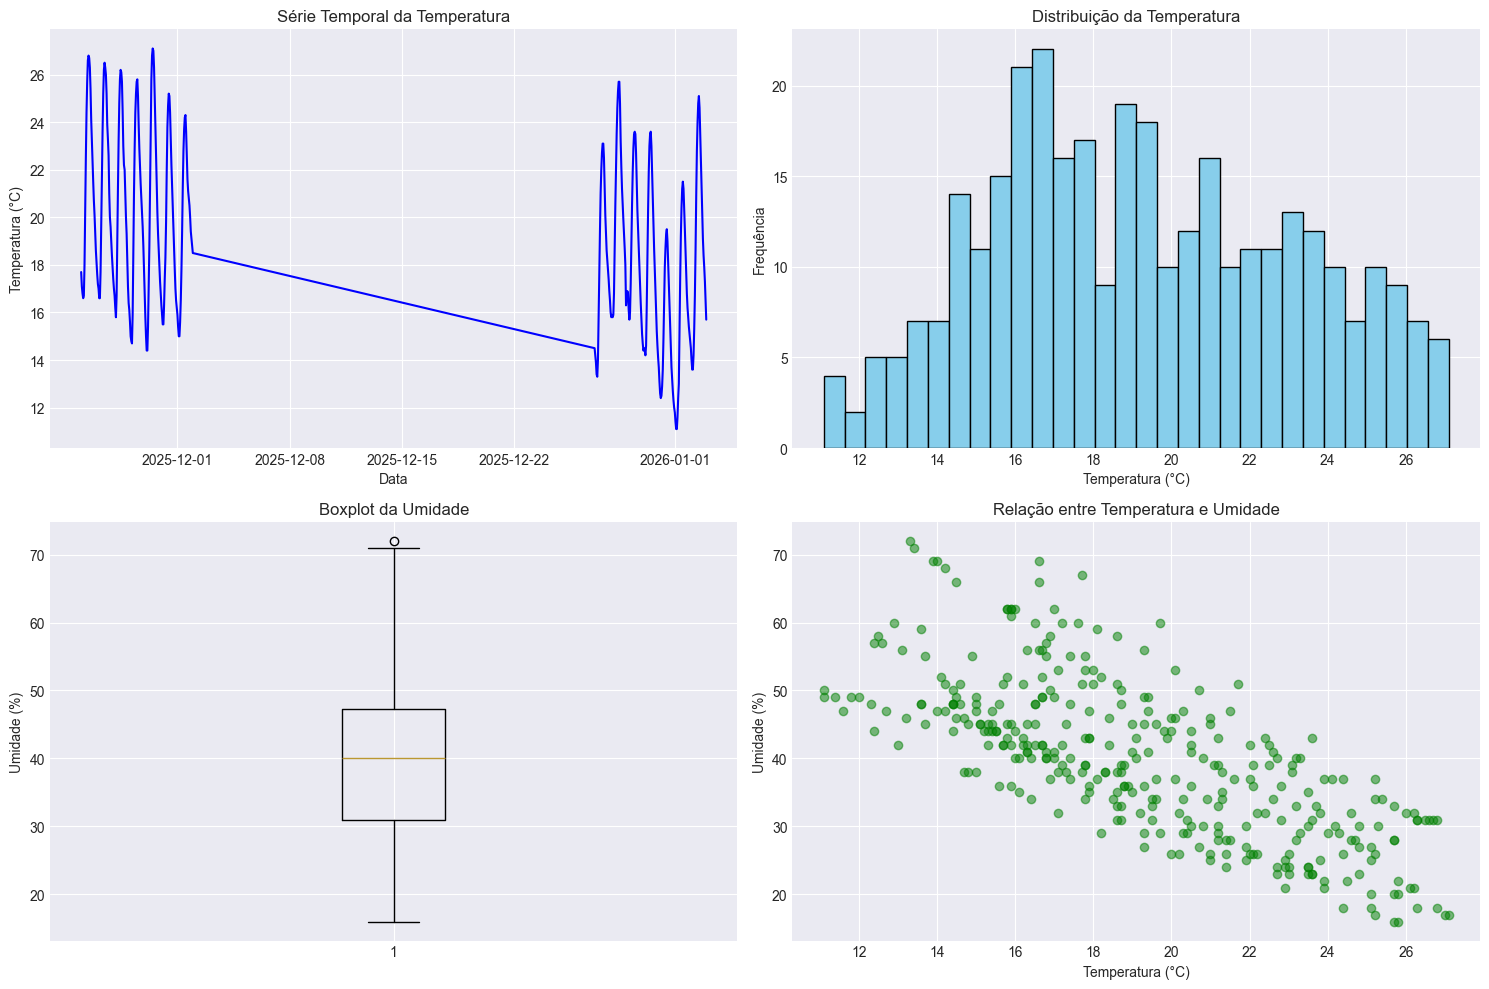

In [31]:

# plots deprecateds individuais
# # Histograma da temperatura 
# plt.figure(figsize=(10, 5)) 
# plt.hist(df['temp'], bins=30, color='skyblue', edgecolor='black')
# plt.title('Distribuição da Temperatura')
# plt.xlabel('Temperatura (°C)')
# plt.ylabel('Frequência')
# plt.show()

# # Boxplot da umidade
# plt.figure(figsize=(8, 6))
# plt.boxplot(df['humidity'])
# plt.title('Boxplot da Umidade')
# plt.ylabel('Umidade (%)')
# plt.show()

# # scatter plot entre temperatura e umidade
# plt.figure(figsize=(10, 6))
# plt.scatter(df['temp'], df['humidity'], alpha=0.5, color='green')
# plt.title('Relação entre Temperatura e Umidade')
# plt.xlabel('Temperatura (°C)')
# plt.ylabel('Umidade (%)')
# plt.show()


# Plot geral lado a lado
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
# Série temporal da temperatura
axs[0, 0].plot(pd.to_datetime(df['time']), df['temp'], color='blue')
axs[0, 0].set_title('Série Temporal da Temperatura')
axs[0, 0].set_xlabel('Data')
axs[0, 0].set_ylabel('Temperatura (°C)')
# Histograma da temperatura
axs[0, 1].hist(df['temp'], bins=30, color='skyblue', edgecolor='black')
axs[0, 1].set_title('Distribuição da Temperatura')
axs[0, 1].set_xlabel('Temperatura (°C)')
axs[0, 1].set_ylabel('Frequência')
# Boxplot da umidade
axs[1, 0].boxplot(df['humidity'])
axs[1, 0].set_title('Boxplot da Umidade')
axs[1, 0].set_ylabel('Umidade (%)')
# Scatter plot entre temperatura e umidade
axs[1, 1].scatter(df['temp'], df['humidity'], alpha=0.5, color='green')
axs[1, 1].set_title('Relação entre Temperatura e Umidade')
axs[1, 1].set_xlabel('Temperatura (°C)')    
axs[1, 1].set_ylabel('Umidade (%)')
plt.tight_layout()
plt.show()
# Fim do notebook

### Análise Temporal profunda

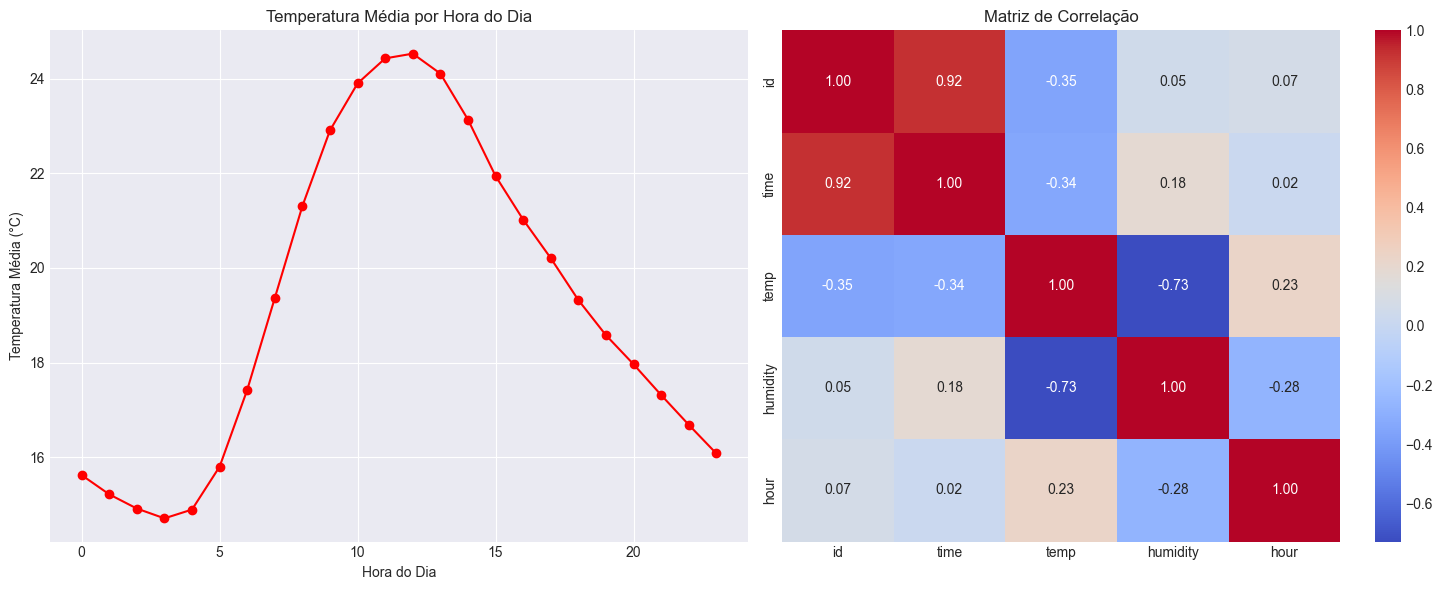

In [34]:
# # temperatura média por hora do dia
# df['hour'] = pd.to_datetime(df['time']).dt.hour
# temp_hourly_avg = df.groupby('hour')['temp'].mean().reset_index()
# plt.figure(figsize=(10, 5))
# plt.plot(temp_hourly_avg['hour'], temp_hourly_avg['temp'], marker='o')
# plt.title('Temperatura Média por Hora do Dia')
# plt.xlabel('Hora do Dia')
# plt.ylabel('Temperatura Média (°C)')
# plt.show()

# # Matriz de correlação entre todas as variáveis numéricas

# plt.figure(figsize=(10, 8)) 
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
# plt.title('Matriz de Correlação')
# plt.show()

# Variáveis para os dois plots
corr_matrix = df.corr()
df['hour'] = pd.to_datetime(df['time']).dt.hour
temp_hourly_avg = df.groupby('hour')['temp'].mean().reset_index()

# Agrupando dois plots em uma unica figura com subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
# Temperatura média por hora do dia
axs[0].plot(temp_hourly_avg['hour'], temp_hourly_avg['temp'], marker='o', color='red')
axs[0].set_title('Temperatura Média por Hora do Dia')
axs[0].set_xlabel('Hora do Dia')
axs[0].set_ylabel('Temperatura Média (°C)')
# Matriz de correlação entre todas as variáveis 
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=axs[1])
axs[1].set_title('Matriz de Correlação')
plt.tight_layout()
plt.show()
  

## Decomposição de Série Temporal

Separamos a temperatura em 3 componentes:

- **Trend (Tendência):** Direção Geral ao longo do tempo. Nota-se queda gradual (Fim de novembro -> Início de janeiro, inverno no hemisfério norte).

- **Seasonal (Sazonalidade):** Padrão que se repete a cada 24 (ciclo dia/noite)

- **Residual (Ruído):** Flutuações aleatórias. Resíduo baixo indica que o modelo capturou bem os padrões

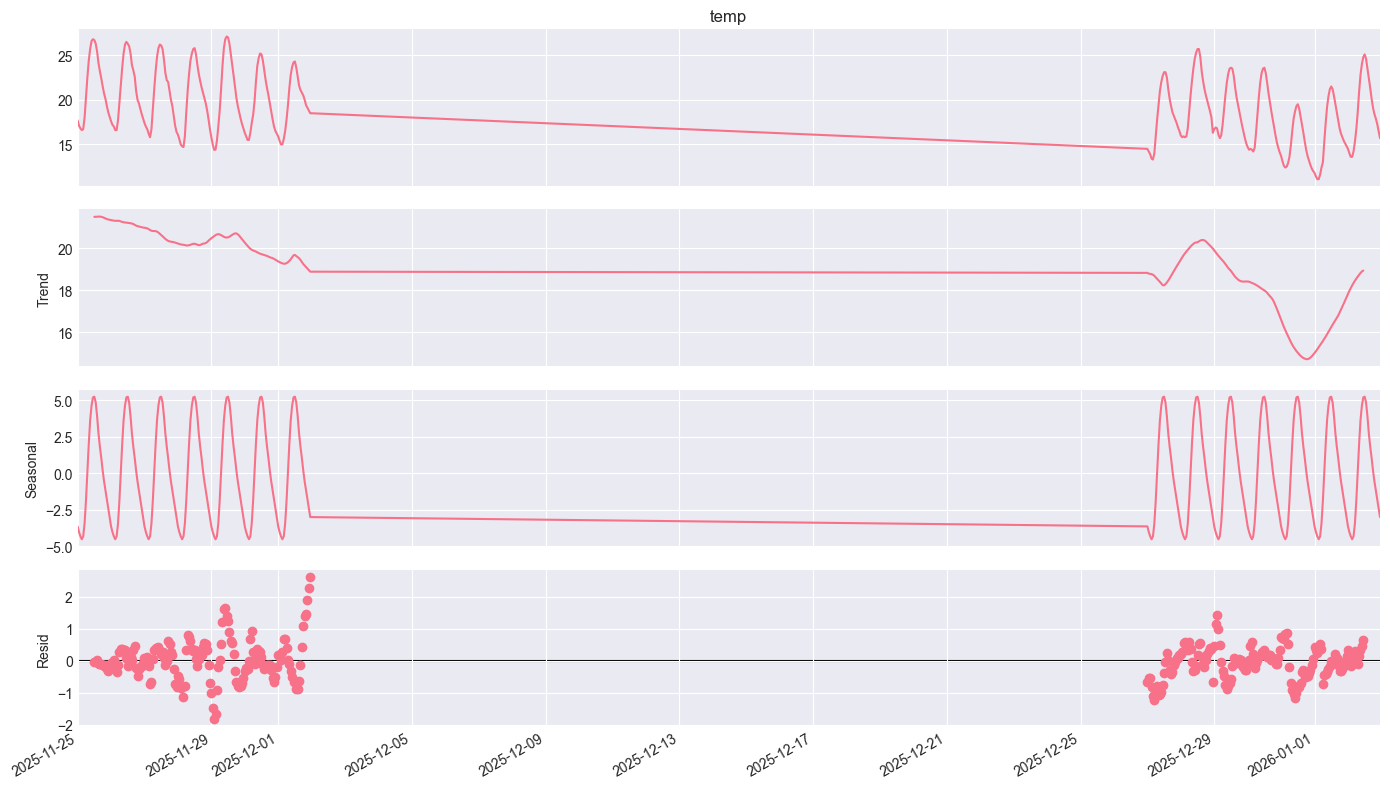

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

# preparando dados

df_temp = df.set_index('time')  # Define 'time' como índice
df_temp.index = pd.to_datetime(df_temp.index)  # Converte o índice para datetime

# Decompondo a série temporal
decomposition = seasonal_decompose(df_temp['temp'], 
                                   model='additive', 
                                   period=24)

# Plotando os componentes da decomposição
fig = decomposition.plot()
fig.set_size_inches(14, 8)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

##  Média Móvel (Rolling Average)



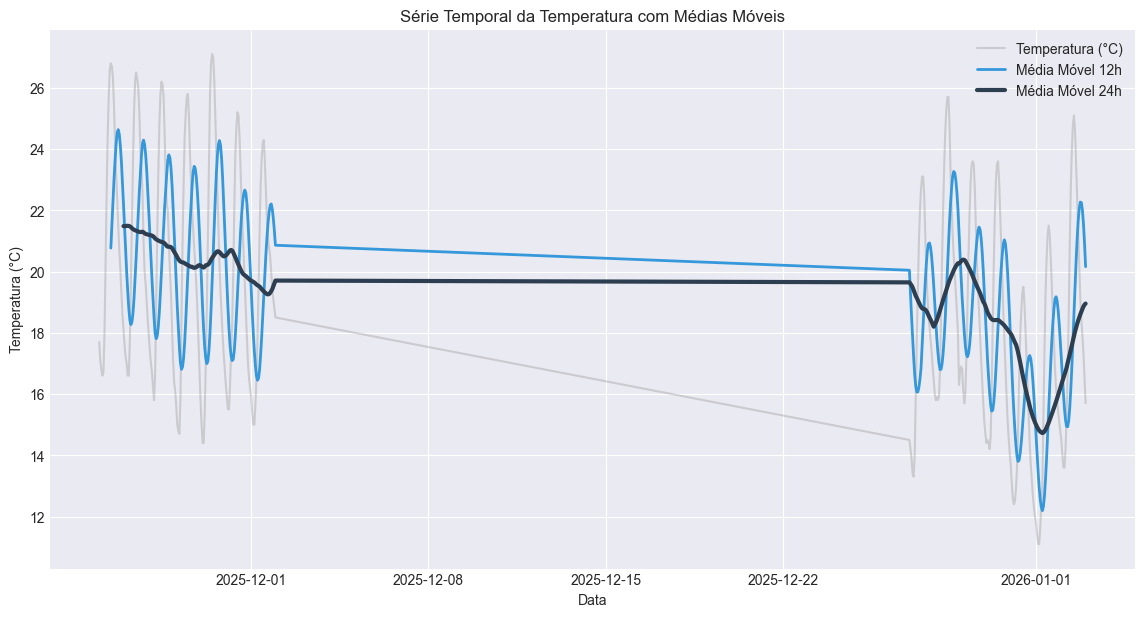

In [52]:
# Plot de linha para média móvel da temperatura com janela de 12 e 24 horas
df_temp['rolling_12'] = df_temp['temp'].rolling(window=12).mean()
df_temp['rolling_24'] = df_temp['temp'].rolling(window=24).mean()

# Plotando a série temporal com médias móveis
plt.figure(figsize=(14, 7))
plt.plot(df_temp.index, df_temp['temp'], label='Temperatura (°C)', color='gray', alpha=0.3)
plt.plot(df_temp.index, df_temp['rolling_12'], label='Média Móvel 12h',color='#3498db', linewidth=2)
plt.plot(df_temp.index, df_temp['rolling_24'], label='Média Móvel 24h', color='#2c3e50', linewidth=3)
plt.title('Série Temporal da Temperatura com Médias Móveis')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()


## Autocorrelação (ACF)

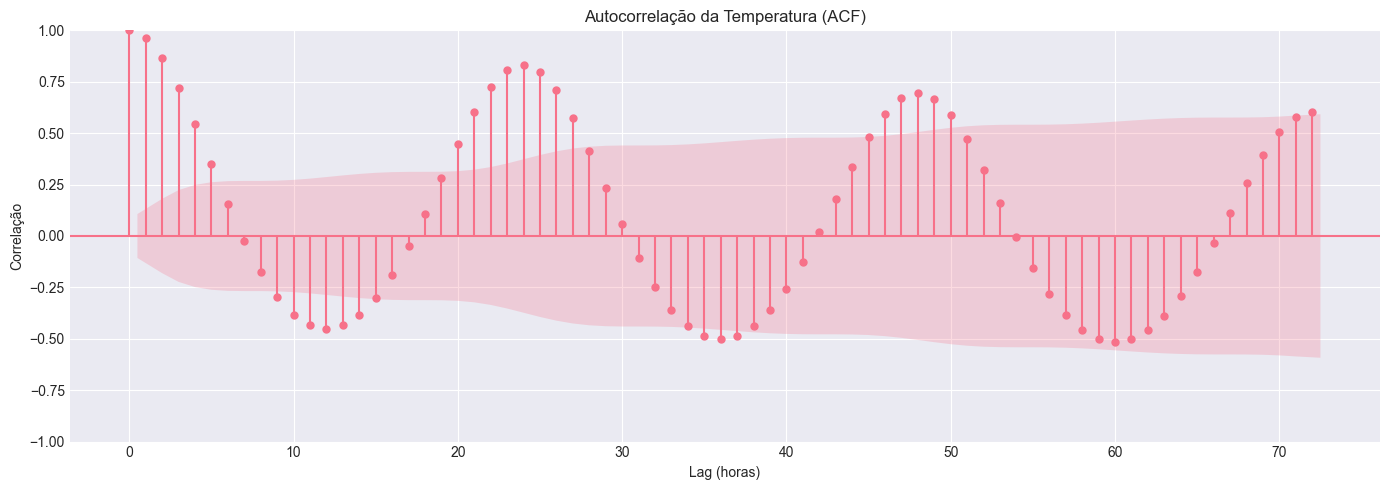

In [53]:
# Importando plot_acf 
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(14, 5))
plot_acf(
    df_temp['temp'].dropna(),  # Remove NaNs
    lags=72,  # 72 horas (3 dias)
    ax=ax
)
plt.title('Autocorrelação da Temperatura (ACF)')
plt.xlabel('Lag (horas)')
plt.ylabel('Correlação')
plt.tight_layout()
plt.show()

## Conclusões e Insights

### Principais Descobertas:

#### 1. Padrão Diário Bem Definido

**O que encontramos:** A temperatura segue um ciclo de 24 horas, com pico às 13h (~24.5°C) e mínimo às 5h (~14.5°C).

**Significado:** Esse padrão reflete o aquecimento solar diurno e resfriamento noturno, com amplitude de aproximadamente 10°C.

**Evidência:** O gráfico de médias móveis e o ACF confirmam a periodicidade diária, com picos de autocorrelação a cada 24 lags.

---

#### 2. Tendência de Queda ao Longo do Tempo

**O que encontramos:** A temperatura média está diminuindo gradualmente ao longo do período analisado (25/11/2025 a 02/01/2026).

**Significado:** Transição de final de novembro para início de janeiro indica chegada do inverno no hemisfério norte.

**Evidência:** A decomposição de séries temporais mostra claramente a tendência descendente, separada da sazonalidade diária.

---

#### 3. Correlação Negativa Entre Temperatura e Umidade

**O que encontramos:** Correlação de -0.73 entre temperatura e umidade relativa.

**Significado:** Quando a temperatura sobe, a umidade relativa desce. Isso ocorre porque ar quente comporta mais vapor d'água, fazendo com que a umidade percentual diminua mesmo que a quantidade absoluta de água no ar permaneça constante.

**Evidência:** Scatter plot mostra clara relação inversa, confirmada pela matriz de correlação.

---

#### 4. Sazonalidade Forte e Consistente

**O que encontramos:** Autocorrelação significativa persiste até 72 horas (3 dias) com padrão oscilatório.

**Significado:** A temperatura de um determinado horário é fortemente correlacionada com o mesmo horário do dia anterior, confirmando previsibilidade do padrão diário.

**Evidência:** ACF mostra picos positivos a cada ~24 lags e values negativos a cada ~12 lags (oposição dia/noite).

---

### Próximos Passos:

- Modelagem preditiva com ARIMA/SARIMA para previsão de temperatura
- Expansão do dataset com features adicionais (pressão atmosférica, vento, precipitação)
- Desenvolvimento de sistema de alertas baseado em anomalias
- Integração com modelos de machine learning para previsões de longo prazo